In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data = pd.read_csv("cardata.csv")
data.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [34]:
data.drop_duplicates(inplace=True)

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["Car_Name"] = le.fit_transform(data["Car_Name"])
data["Fuel_Type"] = le.fit_transform(data["Fuel_Type"])
data["Seller_Type"] = le.fit_transform(data["Seller_Type"])
data["Transmission"] = le.fit_transform(data["Transmission"])

In [36]:
data.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0


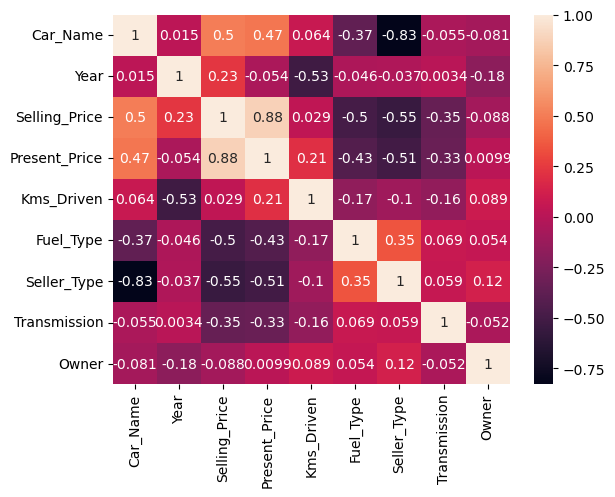

In [37]:
sns.heatmap(data=data.corr(), annot=True)
plt.show()

In [38]:
x = data.drop(columns="Selling_Price")
y = data["Selling_Price"]

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [40]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=52)

# Model Apply

In [41]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, VotingRegressor

In [42]:
# lr = LinearRegression()
# lr.fit(x_train, y_train)
# lr.score(x_test, y_test)*100 , lr.score(x_train, y_train)*100

In [43]:
# ls = Lasso(alpha=0.02)
# ls.fit(x_train, y_train)
# ls.score(x_test, y_test)*100 , ls.score(x_train, y_train)*100

In [44]:
# ri = Ridge(alpha=20)
# ri.fit(x_train, y_train)
# ri.score(x_test, y_test)*100 , ri.score(x_train, y_train)*100

In [45]:
# el = ElasticNet(alpha=0.05)
# el.fit(x_train, y_train)
# el.score(x_test, y_test)*100 , el.score(x_train, y_train)*100

In [46]:
# dr = DecisionTreeRegressor(max_depth=5)
# dr.fit(x_train, y_train)
# dr.score(x_test, y_test)*100 , dr.score(x_train, y_train)*100

In [47]:
# for i in range(1,30):
#     dr = DecisionTreeRegressor(max_depth=i)
#     dr.fit(x_train, y_train)
#     print(i,dr.score(x_test, y_test)*100 , dr.score(x_train, y_train)*100)

In [48]:
# sv = SVR(kernel='linear')
# sv.fit(x_train, y_train)
# sv.score(x_test, y_test)*100 , sv.score(x_train, y_train)*100

In [49]:
# knn = KNeighborsRegressor(n_neighbors=10)
# knn.fit(x_train, y_train)
# knn.score(x_test, y_test)*100 , knn.score(x_train, y_train)*100

In [50]:
rf = RandomForestRegressor(n_estimators=6)
rf.fit(x_train, y_train)
rf.score(x_test, y_test)*100 , rf.score(x_train, y_train)*100

(96.27157616620056, 98.5366163163056)

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_squared_error(y_test, rf.predict(x_test)) , mean_absolute_error(y_test, rf.predict(x_test))

(0.9193376851851853, 0.5821666666666666)

In [52]:
# for i in range(1,30):
#     rf1 = RandomForestRegressor(n_estimators=i)
#     rf1.fit(x_train, y_train)
#     print(i,rf1.score(x_test, y_test)*100 , rf1.score(x_train, y_train)*100)

In [53]:
# Real Value...

y_test.head()

92      3.51
0       3.35
109     1.20
6       6.75
63     23.50
Name: Selling_Price, dtype: float64

In [54]:
# Predicted Value...

rf.predict([[0.919985,-2.979020,0.720048,0.977750,0.491847,-0.741096,0.387298,-0.175101]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([4.24166667])

In [55]:
x_test.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
91,0.919985,-2.979020,0.720048,0.977750,0.491847,-0.741096,0.387298,-0.175101
0,1.076344,0.132992,-0.228097,-0.254603,0.491847,-0.741096,0.387298,-0.175101
107,-0.643610,1.170329,-0.709768,-0.665387,0.491847,1.349353,0.387298,-0.175101
6,0.216367,0.478771,0.067687,-0.465233,0.491847,-0.741096,0.387298,-0.175101
62,0.724535,0.478771,3.322477,0.258878,-1.880124,-0.741096,-2.581989,-0.175101


In [56]:
new_data = pd.DataFrame([["ritz",2014,5.59,27000,"Petrol","Dealer","Manual",0]], columns=x_train.columns)
new_data

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0


In [57]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
new_data["Car_Name"] = le1.fit_transform(new_data["Car_Name"])
new_data["Fuel_Type"] = le1.fit_transform(new_data["Fuel_Type"])
new_data["Seller_Type"] = le1.fit_transform(new_data["Seller_Type"])
new_data["Transmission"] = le1.fit_transform(new_data["Transmission"])

In [58]:
new_data

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0,2014,5.59,27000,0,0,0,0


In [59]:
new_data = pd.DataFrame(sc.transform(new_data),columns=new_data.columns)

In [60]:
rf.predict(new_data)

array([4.1])